In [ ]:
!pip install kaggle
!kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset
import zipfile
import os
# Define the path to the downloaded ZIP file
zip_file_path = 'brain-tumor-mri-dataset.zip'

# Define the directory to extract files to 0
extract_dir = '/content/brain-tumor-mri-dataset'

# Create the directory if it does not exist
os.makedirs(extract_dir, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"Dataset extracted to {extract_dir}")


Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 1741, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'


FileNotFoundError: [Errno 2] No such file or directory: 'brain-tumor-mri-dataset.zip'

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [ ]:
# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
#data normalization
validation_datagen = ImageDataGenerator(rescale=1./255)

# Load data (replace with your dataset paths)
train_generator = train_datagen.flow_from_directory(
    '/content/brain-tumor-mri-dataset/Training',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    '/content/brain-tumor-mri-dataset/Testing',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)



Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [ ]:
# Building a custom CNN model
model = Sequential()

# First Convolutional Block
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Second Convolutional Block
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Third Convolutional Block
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Fourth Convolutional Block
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Fully Connected Layers
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(train_generator.num_classes, activation='softmax'))

# # Compile the model
# model.compile(optimizer=Adam(learning_rate=0.001),
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 126, 126, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 61, 61, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 28, 28, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 12, 12, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       4,719,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │              

 Total params: 5,178,180 (19.75 MB)

 Trainable params: 5,175,940 (19.74 MB)

 Non-trainable params: 2,240 (8.75 KB)

In [ ]:
# # Callbacks for early stopping and learning rate reduction
# early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

# callbacks = [early_stopping, reduce_lr]

In [ ]:
# # Train the model
# history = model.fit(
#     train_generator,
#     epochs=50,
#     validation_data=validation_generator,
#     callbacks=callbacks
# )

In [ ]:
# # Evaluate the model on the validation data
# val_loss, val_acc = model.evaluate(validation_generator)
# print(f"Validation Loss: {val_loss:.4f}")
# print(f"Validation Accuracy: {val_acc:.4f}")

# # Plotting training & validation accuracy values
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('Model accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Validation'], loc='upper left')
# plt.show()

# # Plotting training & validation loss values
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Validation'], loc='upper left')
# plt.show()


Epoch 1/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 56s 252ms/step - accuracy: 0.8415 - loss: 0.4289 - val_accuracy: 0.7529 - val_loss: 0.8291 - learning_rate: 0.0100
Epoch 2/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 35s 189ms/step - accuracy: 0.8515 - loss: 0.4247 - val_accuracy: 0.7498 - val_loss: 0.8151 - learning_rate: 0.0100
Epoch 3/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 36s 188ms/step - accuracy: 0.8468 - loss: 0.4184 - val_accuracy: 0.6682 - val_loss: 1.4662 - learning_rate: 0.0100
Epoch 4/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 36s 195ms/step - accuracy: 0.8746 - loss: 0.3678 - val_accuracy: 0.8375 - val_loss: 0.4254 - learning_rate: 0.0100
Epoch 5/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 35s 192ms/step - accuracy: 0.8503 - loss: 0.4171 - val_accuracy: 0.3089 - val_loss: 4.7148 - learning_rate: 0.0100
Epoch 6/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 34s 182ms/step - accuracy: 0.8187 - loss: 0.4810 - val_accuracy: 0.6087 - val_loss: 1.5902 - learning_rate: 0.0100
Epoch 7/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 35s 192ms/step - accuracy: 0.8

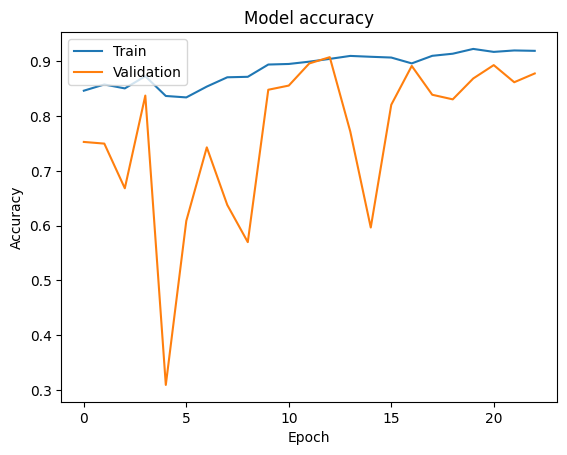

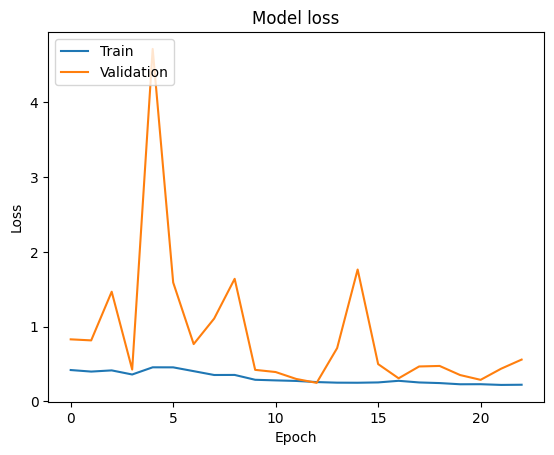

In [ ]:
# Compile the model with a higher learning rate
model.compile(optimizer=Adam(learning_rate=0.01),  # Increased learning rate from 0.001 to 0.01
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

callbacks = [early_stopping, reduce_lr]

# Train the model
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=callbacks
)

# Evaluate the model on the validation data
val_loss, val_acc = model.evaluate(validation_generator)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}")

# Plotting training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plotting training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np

# Get the true labels and predictions
validation_generator.reset()  # Reset the generator before predicting
Y_pred = model.predict(validation_generator, validation_generator.samples // validation_generator.batch_size + 1)
y_pred = np.argmax(Y_pred, axis=1)
# Get the true labels
y_true = validation_generator.classes
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
# Print confusion matrix
print("Confusion Matrix")
print(cm)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=validation_generator.class_indices.keys(), yticklabels=validation_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Classification Report
print("Classification Report")
target_names = list(validation_generator.class_indices.keys())
print(classification_report(y_true, y_pred, target_names=target_names))


NameError: name 'validation_generator' is not defined

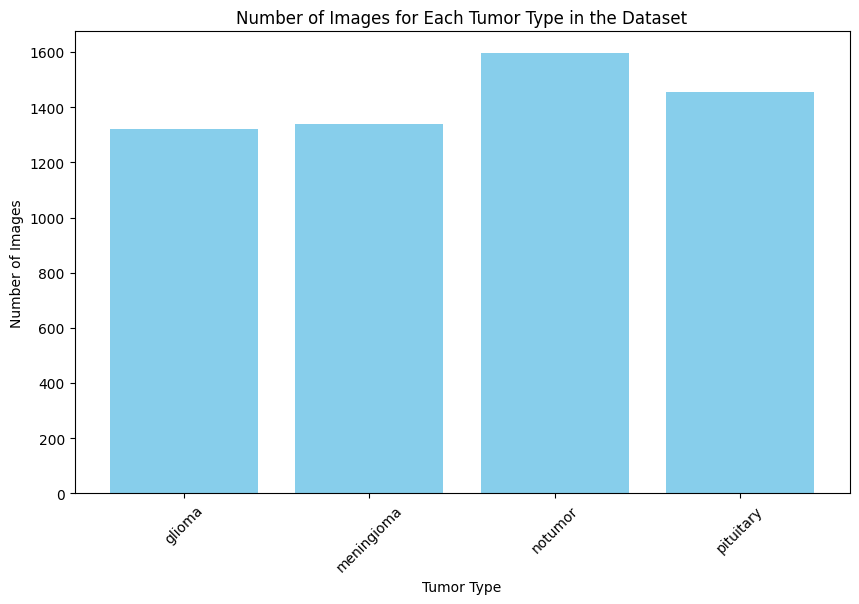

In [ ]:
import os
import matplotlib.pyplot as plt

# Define the path to the dataset directory
dataset_dir = '/content/brain-tumor-mri-dataset/Training'

# Dictionary to hold the count of images for each class
class_counts = {}

# Iterate over each class directory and count the number of images
for class_name in os.listdir(dataset_dir):
    class_path = os.path.join(dataset_dir, class_name)
    if os.path.isdir(class_path):
        class_counts[class_name] = len(os.listdir(class_path))

# Plotting the number of images in each class
plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.xlabel('Tumor Type')
plt.ylabel('Number of Images')
plt.title('Number of Images for Each Tumor Type in the Dataset')
plt.xticks(rotation=45)
plt.show()


In [ ]:
import os

# Define the paths to the dataset directories
training_dir = '/content/brain-tumor-mri-dataset/Training'
testing_dir = '/content/brain-tumor-mri-dataset/Testing'

# Function to count images in a directory
def count_images(directory):
    total_images = 0
    class_image_counts = {}

    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            num_images = len(os.listdir(class_path))
            class_image_counts[class_name] = num_images
            total_images += num_images

    return total_images, class_image_counts

# Count images in Training set
train_total, train_class_counts = count_images(training_dir)

# Count images in Testing set
test_total, test_class_counts = count_images(testing_dir)

# Print the results
print(f"Total images in Training set: {train_total}")
print(f"Total images in Testing set: {test_total}")
print(f"Total images in entire dataset: {train_total + test_total}")

print("\nNumber of images per class in Training set:")
for class_name, count in train_class_counts.items():
    print(f"{class_name}: {count}")

print("\nNumber of images per class in Testing set:")
for class_name, count in test_class_counts.items():
    print(f"{class_name}: {count}")


Total images in Training set: 5712
Total images in Testing set: 1311
Total images in entire dataset: 7023

Number of images per class in Training set:
glioma: 1321
meningioma: 1339
notumor: 1595
pituitary: 1457

Number of images per class in Testing set:
glioma: 300
meningioma: 306
notumor: 405
pituitary: 300


In [ ]:
import os

# Define the root path to the extracted dataset
dataset_root = '/content/brain-tumor-mri-dataset'

# List all directories and files in the root path
for root, dirs, files in os.walk(dataset_root):
    print(f"Root: {root}")
    print(f"Dirs: {dirs}")
    print(f"Files: {files}")
    print()



Root: /content/brain-tumor-mri-dataset
Dirs: ['Testing', 'Training']
Files: []

Root: /content/brain-tumor-mri-dataset/Testing
Dirs: ['glioma', 'meningioma', 'notumor', 'pituitary']
Files: []

Root: /content/brain-tumor-mri-dataset/Testing/glioma
Dirs: []
Files: ['Te-gl_0016.jpg', 'Te-gl_0174.jpg', 'Te-gl_0160.jpg', 'Te-gl_0170.jpg', 'Te-gl_0186.jpg', 'Te-gl_0157.jpg', 'Te-gl_0243.jpg', 'Te-gl_0237.jpg', 'Te-gl_0279.jpg', 'Te-gl_0167.jpg', 'Te-gl_0098.jpg', 'Te-gl_0143.jpg', 'Te-gl_0199.jpg', 'Te-gl_0286.jpg', 'Te-gl_0192.jpg', 'Te-gl_0235.jpg', 'Te-gl_0057.jpg', 'Te-gl_0277.jpg', 'Te-gl_0079.jpg', 'Te-gl_0052.jpg', 'Te-gl_0133.jpg', 'Te-gl_0256.jpg', 'Te-gl_0144.jpg', 'Te-gl_0019.jpg', 'Te-gl_0113.jpg', 'Te-gl_0181.jpg', 'Te-gl_0048.jpg', 'Te-glTr_0000.jpg', 'Te-gl_0012.jpg', 'Te-gl_0140.jpg', 'Te-gl_0216.jpg', 'Te-gl_0263.jpg', 'Te-gl_0246.jpg', 'Te-gl_0141.jpg', 'Te-gl_0287.jpg', 'Te-gl_0190.jpg', 'Te-gl_0258.jpg', 'Te-gl_0266.jpg', 'Te-gl_0250.jpg', 'Te-gl_0274.jpg', 'Te-gl_0252.jp

In [ ]:
# Load and preprocess the dataset
train_data = []
for category in categories:
    folder_path = os.path.join(train_dir, category)
    images = os.listdir(folder_path)
    count = len(images)
    train_data.append(pd.DataFrame({"Image": images, "Category": [category] * count, "Count": [count] * count}))

train_df = pd.concat(train_data, ignore_index=True)

# Visualize the distribution of tumor types in the training dataset
plt.figure(figsize=(8, 6))
sns.barplot(data=train_df, x="Category", y="Count")
plt.title("Distribution of Tumor Types")
plt.xlabel("Tumor Type")
plt.ylabel("Count")
plt.show()

NameError: name 'categories' is not defined

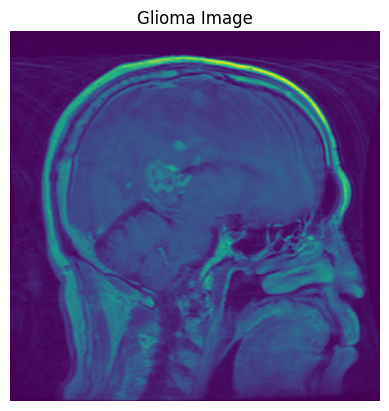

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to the Glioma directory
glioma_dir = '/content/brain-tumor-mri-dataset/Testing/glioma'

# Get a list of all images in the Glioma directory
glioma_images = os.listdir(glioma_dir)

# Randomly select an image
import random
selected_image = random.choice(glioma_images)

# Construct the full path to the selected image
image_path = os.path.join(glioma_dir, selected_image)

# Load and display the image
img = mpimg.imread(image_path)
plt.imshow(img)
plt.title('Glioma Image')
plt.axis('off')
plt.show()


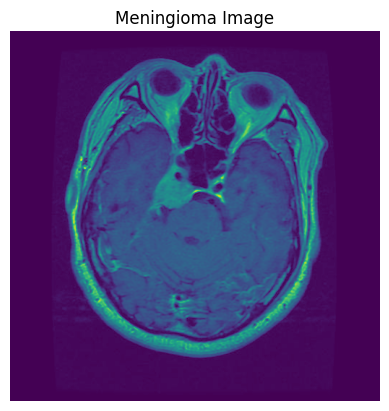

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

# Path to the Meningioma directory
meningioma_dir = '/content/brain-tumor-mri-dataset/Testing/meningioma'

# Get a list of all images in the Meningioma directory
meningioma_images = os.listdir(meningioma_dir)

# Randomly select an image
selected_image = random.choice(meningioma_images)

# Construct the full path to the selected image
image_path = os.path.join(meningioma_dir, selected_image)

# Load and display the image
img = mpimg.imread(image_path)
plt.imshow(img)
plt.title('Meningioma Image')
plt.axis('off')
plt.show()


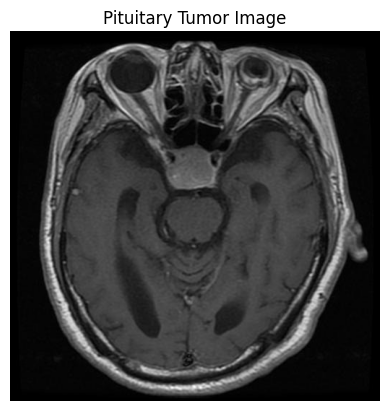

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

# Path to the Pituitary directory
pituitary_dir = '/content/brain-tumor-mri-dataset/Testing/pituitary'

# Get a list of all images in the Pituitary directory
pituitary_images = os.listdir(pituitary_dir)

# Randomly select an image
selected_image = random.choice(pituitary_images)

# Construct the full path to the selected image
image_path = os.path.join(pituitary_dir, selected_image)

# Load and display the image
img = mpimg.imread(image_path)
plt.imshow(img)
plt.title('Pituitary Tumor Image')
plt.axis('off')
plt.show()


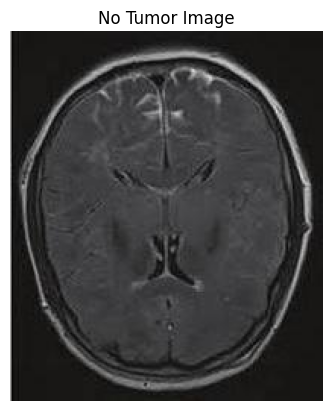

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

# Path to the No Tumor directory
no_tumor_dir = '/content/brain-tumor-mri-dataset/Testing/notumor'

# Get a list of all images in the No Tumor directory
no_tumor_images = os.listdir(no_tumor_dir)

# Randomly select an image
selected_image = random.choice(no_tumor_images)

# Construct the full path to the selected image
image_path = os.path.join(no_tumor_dir, selected_image)

# Load and display the image
img = mpimg.imread(image_path)
plt.imshow(img)
plt.title('No Tumor Image')
plt.axis('off')
plt.show()


In [ ]:
import os
import random

def get_random_image_path(class_name):
    # Define the base path for the dataset
    base_path = '/content/brain-tumor-mri-dataset/Testing'

    # Construct the full path for the class
    class_dir = os.path.join(base_path, class_name)

    # Get a list of all images in the class directory
    image_files = os.listdir(class_dir)

    # Select a random image from the directory
    selected_image = random.choice(image_files)

    # Return the full path to the selected image
    return os.path.join(class_dir, selected_image)


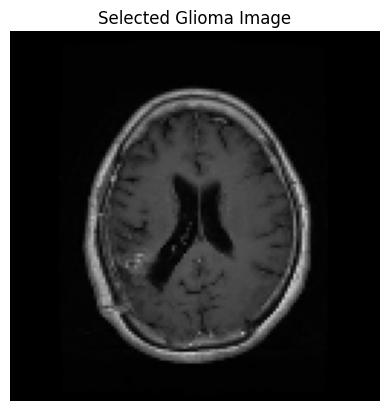

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the image
def load_and_preprocess_image(img_path, target_size=(128, 128)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Normalize the image
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img, img_array

# Select a random image from the "glioma" class
selected_image_path = get_random_image_path('glioma')
img, img_array = load_and_preprocess_image(selected_image_path)

# Display the selected image
plt.imshow(img)
plt.title('Selected Glioma Image')
plt.axis('off')
plt.show()



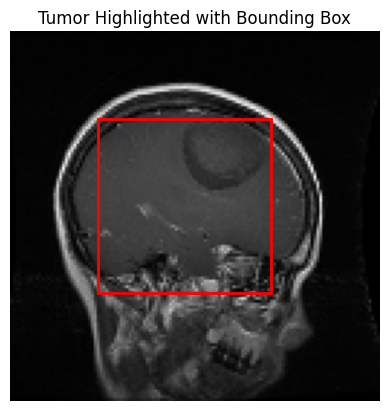

In [ ]:
import matplotlib.patches as patches
import random

# Function to highlight the tumor by drawing a bounding box
def highlight_tumor_with_box(img, bbox_coords):
    # Create a figure and axis to display the image
    fig, ax = plt.subplots(1)
    ax.imshow(img)

    # Create a Rectangle patch to highlight the tumor
    x, y, width, height = bbox_coords
    rect = patches.Rectangle((x, y), width, height, linewidth=2, edgecolor='r', facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)

    plt.title('Tumor Highlighted with Bounding Box')
    plt.axis('off')
    plt.show()

# Select a random image from the "glioma" class
selected_image_path = get_random_image_path('glioma')
img, img_array = load_and_preprocess_image(selected_image_path)

# Define bounding box coordinates (x, y, width, height)
# These coordinates are hypothetical and may need adjustment based on the actual image content
bbox_coords = (30, 30, 60, 60)  # Example coordinates

# Highlight the tumor with the bounding box
highlight_tumor_with_box(img, bbox_coords)


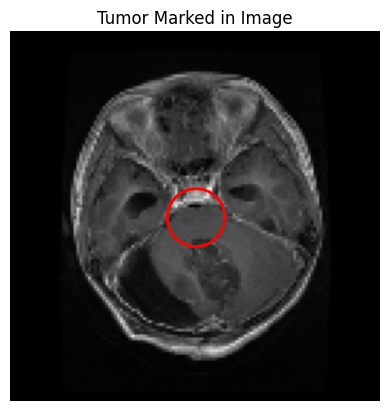

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random
from tensorflow.keras.preprocessing import image

# Function to load and preprocess the image
def load_and_preprocess_image(img_path, target_size=(128, 128)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img, img_array

# Function to mark the tumor
def mark_tumor(img, tumor_center, radius=10):
    fig, ax = plt.subplots()
    ax.imshow(img)

    # Draw a red circle around the tumor
    circ = plt.Circle(tumor_center, radius, color='r', linewidth=2, fill=False)
    ax.add_patch(circ)

    plt.title('Tumor Marked in Image')
    plt.axis('off')
    plt.show()

# Example: Select a random image from the "glioma" class
selected_image_path = '/content/brain-tumor-mri-dataset/Testing/glioma/Te-glTr_0000.jpg'  # Replace with your image path
img, img_array = load_and_preprocess_image(selected_image_path)

# Example coordinates for the tumor (center of the circle)
tumor_center = (64, 64)  # These are hypothetical coordinates and may need to be adjusted based on the image content

# Mark the tumor on the image
mark_tumor(img, tumor_center)
